In [8]:
import yfinance as yf
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings('ignore')


from data_downloader import DataDownloader, ClimateDataCleaner, EconomicDataCleaner
from var_model import ClimateVAR
from sdice_model import SimplifiedDICE

In [9]:
# Instancia para limpiar y procesar los datos climáticos
climate_cleaner = ClimateDataCleaner('Data/Temperature.csv', 'Data/Drought_Severity.csv', 'Data/CO2_Emissions.xlsx')
climate_data = climate_cleaner.clean_and_prepare_data()

# Instancia para limpiar y procesar los datos climáticos
economic_cleaner = EconomicDataCleaner('Data/GDP.csv', 'Data/TB3MS.csv', 'Data/CPI.csv')
economic_data = economic_cleaner.clean_and_prepare_data()

# Descarga los datos financieros
downloader = DataDownloader()
assets = ['AAPL', 'IBM', 'TSLA', 'GOOG', 'NVDA', 'NEE', 'FSLR', 'VWDRY', 'BEP'] 
benchmark = '^GSPC'  
start_date = '2014-11-01'
end_date = '2024-05-31'
rf = .065

asset_prices, benchmark_prices = downloader.download_data(start_date=start_date, 
                                                          end_date=end_date, 
                                                          assets=assets, 
                                                          benchmark=benchmark)

combined_data = pd.merge(asset_prices, climate_data, on='Date').iloc[:-1]
all_data = pd.merge(combined_data, economic_data, on='Date')


[*********************100%%**********************]  9 of 9 completed
[*********************100%%**********************]  1 of 1 completed


In [14]:
all_data.drop('Date', axis=1, inplace=True)

In [18]:
var_model = ClimateVAR(all_data)
var_results = var_model.fit(maxlags=1)

# Visualizar el resumen del modelo VAR
print(var_results)

# Predicción futura con el modelo VAR
predict = var_model.predict(var_results, lags=5)
print(predict)

[[ 1.41929255e-01  2.46329331e-01  1.15707116e-01  1.26271902e-01
   1.54298817e-01  4.03211309e-02 -3.77622833e-02  3.25469970e-01
   2.28488784e-01  1.77239409e+01 -4.42895960e+00  3.19787558e-02
   6.43620178e-02  7.96760427e-02  6.09213138e-02  2.56893273e+02
  -4.87001202e-01  2.45815624e-01]
 [ 5.80137787e-02 -1.54741012e-01 -1.33688441e-03 -7.43872679e-02
  -1.33608090e-01 -7.29554091e-02  5.98457911e-02  1.06246693e-02
  -2.53713509e-02 -3.50635422e+01  6.26538041e+00 -8.93052023e-02
  -5.36075305e-02 -2.50934640e-02 -3.40931131e-02  7.71649676e+02
   6.92817704e-01  2.09205219e+00]
 [-4.55689742e-02 -2.28765147e-02 -4.68366246e-02 -8.81775697e-02
   1.87660397e-02  4.50032120e-02 -1.49873496e-01 -1.15934472e-01
  -1.26344289e-01 -3.51953474e+01  1.40652069e+01 -9.68785818e-02
  -1.92403873e-02  2.82874828e-02 -1.57715598e-02  1.76090591e+02
   2.25804382e-01  7.84227952e-01]
 [-1.10179325e-01 -2.14550880e-01 -3.38630522e-01 -1.91256454e-01
  -1.42453519e-01 -2.00418819e-01  2.

TypeError: unsupported operand type(s) for +: 'NoneType' and 'int'

<Axes: title={'center': 'Asset Returns'}, xlabel='Date'>

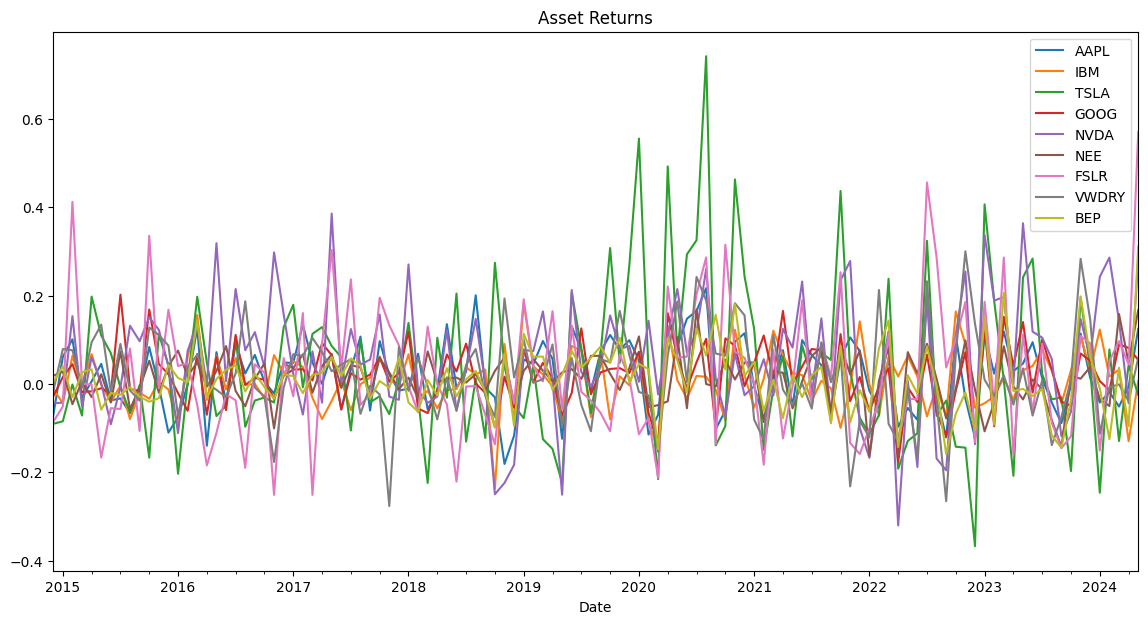

In [10]:
asset_prices.plot(x='Date', y=assets, figsize=(14, 7), title='Asset Returns')

In [11]:
# Assuming beta_calculator.calculate_betas() returns a DataFrame
betas = beta_calculator.calculate_betas()

# Plot the betas
betas.plot(kind='bar', figsize=(14, 7), title='Calculated Betas')

NameError: name 'beta_calculator' is not defined

In [ ]:
# Longitud de asset_prices
len_asset_prices = len(asset_prices)
print(f"Longitud de asset_prices: {len_asset_prices}")

# Longitud de climate_data
len_climate_data = len(climate_data)
print(f"Longitud de climate_data: {len_climate_data}")